This notebook show the data augmentation for classification, detection and segmentation.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import tifffile
from torchsat.transforms import transforms_cls, transforms_det, transforms_seg
from torchsat.utils.visualizer import plot_img, plot_bbox, plot_mask

## classification

### 3 channel image

<Figure size 720x576 with 0 Axes>

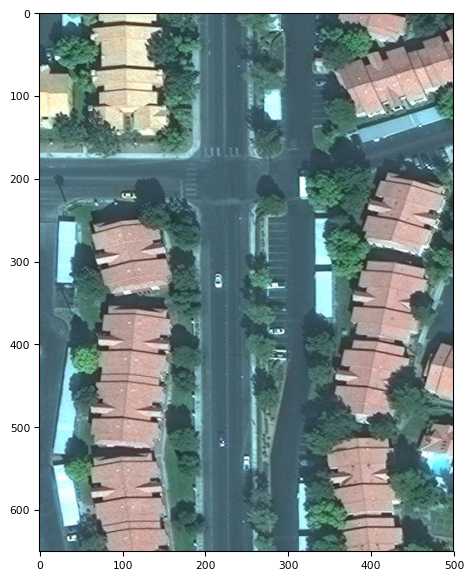

In [2]:
fp = '../tests/fixtures/different-types/jpeg_3channel_uint8.jpeg'
img = np.array(Image.open(fp))
plot_img(img)

<Figure size 720x576 with 0 Axes>

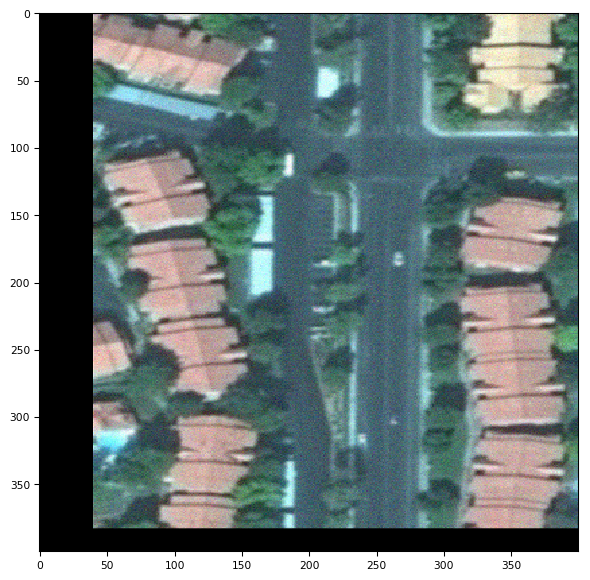

In [5]:
# apply the classification transform
result = transforms_cls.Compose([
    transforms_cls.GaussianBlur(kernel_size=9),
    transforms_cls.RandomNoise(),
    transforms_cls.RandomHorizontalFlip(p=1),
    transforms_cls.RandomShift(max_percent=0.1),
    transforms_cls.Resize(400)
])(img)
plot_img(result)

### 8 channel uint16 tiff image

image shsape: 


<Figure size 720x576 with 0 Axes>

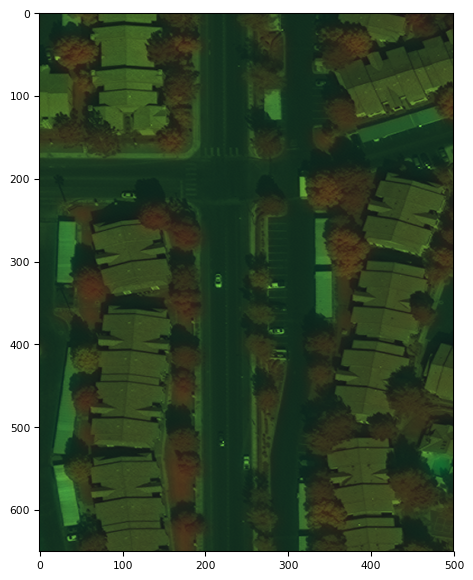

In [7]:
fp = '../tests/fixtures/different-types/tiff_8channel_uint16.tif'
img = tifffile.imread(fp)
print('image shsape: '.format(img.shape))
plot_img(img, channels=(8,3,1))

<Figure size 720x576 with 0 Axes>

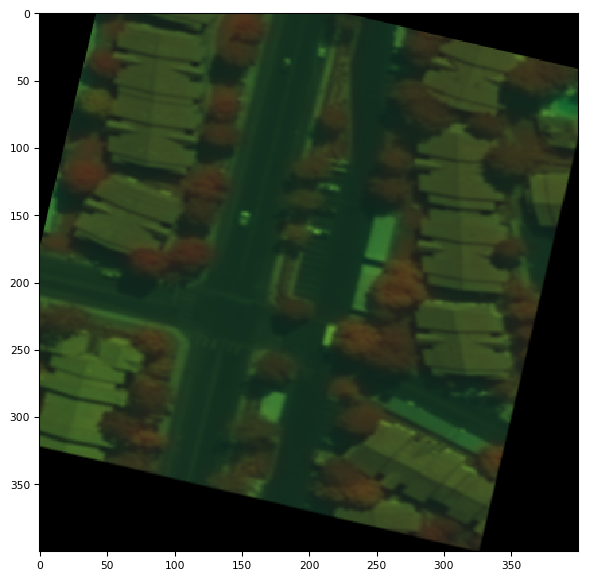

In [8]:
# apply the classification transform
result = transforms_cls.Compose([
    transforms_cls.GaussianBlur(kernel_size=9),
    transforms_cls.RandomVerticalFlip(p=1),
    transforms_cls.RandomShift(max_percent=0.1),
    transforms_cls.Resize(400),
    transforms_cls.RandomRotation(30),
#     transforms_cls.ElasticTransform()
])(img)
plot_img(result, channels=(8,3,1))

# Object detection

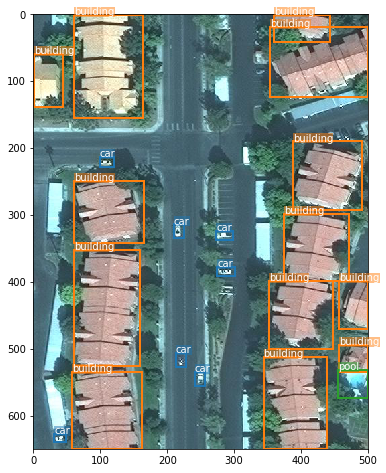

In [2]:
fp_img = '../tests/fixtures/different-types/jpeg_3channel_uint8.jpeg'
img = np.array(Image.open(fp_img))
bboxes = np.array([
    [210, 314, 225, 335],
    [273, 324, 299, 337],
    [275, 378, 302, 391],
    [213, 506, 228, 527],
    [241, 534, 257, 556],
    [31, 627, 49, 640],
    [99, 213, 120, 229],
    [61, 1, 164, 155],
    [1, 59, 44, 138],
    [61, 249, 165, 342],
    [61, 352, 159, 526],
    [58, 535, 163, 650],
    [360, 1, 444, 41],
    [354, 19, 500, 124],
    [388, 190, 491, 292],
    [374, 298, 471, 398],
    [352, 398, 448, 500],
    [457, 399, 500, 471],
    [457, 494, 500, 535],
    [344, 512, 439, 650],
    [455, 532, 500, 574],
])
labels = [1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,3]
classes = ['car', 'building', 'pool']
plot_bbox(img, bboxes, labels=labels, classes=classes)

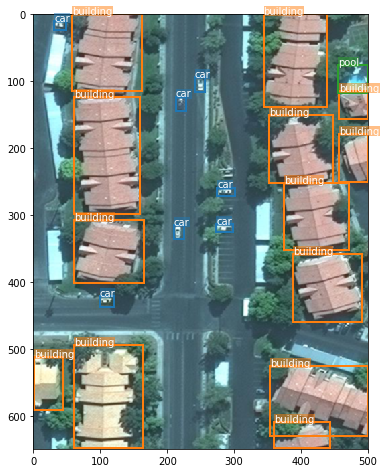

In [5]:
# apply the object detection transform
result_img, result_bboxes, result_labels = transforms_det.Compose([
    transforms_det.GaussianBlur(kernel_size=3),
    transforms_det.RandomFlip(p=1),
])(img, bboxes, labels)
plot_bbox(result_img, result_bboxes, labels=result_labels, classes=classes)

# Semantic Segmentation

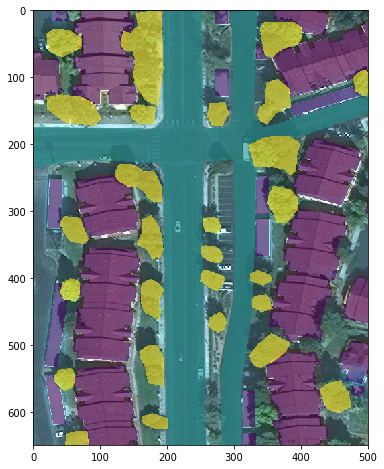

In [2]:
fp_img = '../tests/fixtures/different-types/jpeg_3channel_uint8.jpeg'
fp_mask = '../tests/fixtures/masks/mask_tiff_3channel_uint8.png'
img = np.array(Image.open(fp_img))
mask = np.array(Image.open(fp_mask))
plot_mask(img, mask)

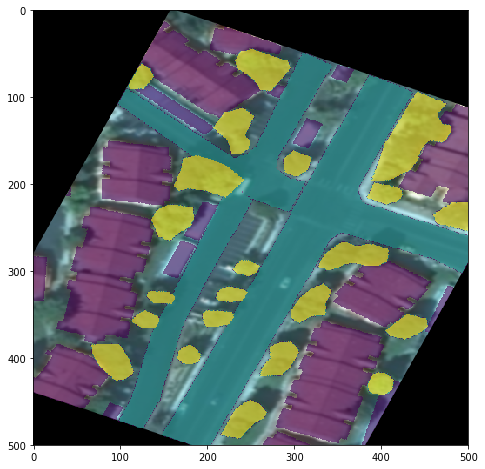

In [13]:
# apply the classification transform
result_img, result_mask = transforms_seg.Compose([
    transforms_seg.GaussianBlur(kernel_size=9),
    transforms_seg.RandomVerticalFlip(p=1),
    transforms_seg.RandomShift(max_percent=0.1),
    transforms_seg.RandomRotation(30),
    transforms_seg.Resize((500,500)),
#     transforms_seg.ElasticTransform()
])(img, mask)
plot_mask(result_img, result_mask)